In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.shape

(26664, 30)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [6]:
df['default payment next month'].mean()

0.2217971797179718

In [7]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
my_lr = LogisticRegression()

In [10]:
my_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [14]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [17]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [19]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [20]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

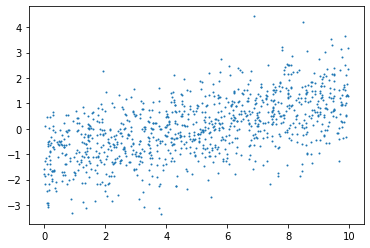

In [21]:
plt.scatter(X,y,s=1)

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.161256600282589
[0.24002588]


In [24]:
y_pred = lin_reg.predict(X.reshape(-1,1))

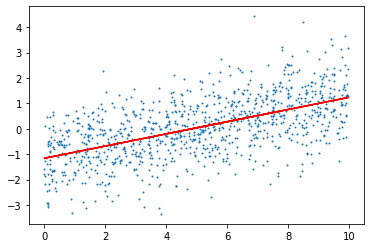

In [25]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [28]:
np.mean(y_train)

0.223102526838873

In [29]:
np.mean(y_test)

0.21657603600225014

In [30]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [31]:
example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)

In [32]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [33]:
example_lr.score(X_test, y_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

In [34]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [35]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [36]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [37]:
prob_sum.shape

(5333,)

In [38]:
np.unique(prob_sum)

array([1.])

In [39]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <a list of 10 Patch objects>)

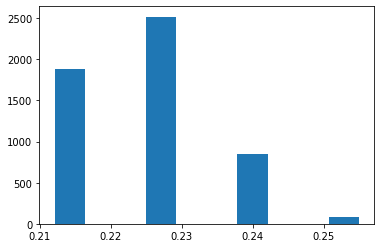

In [40]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

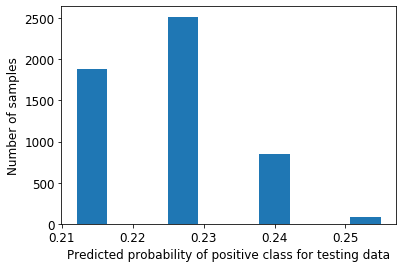

In [41]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [42]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

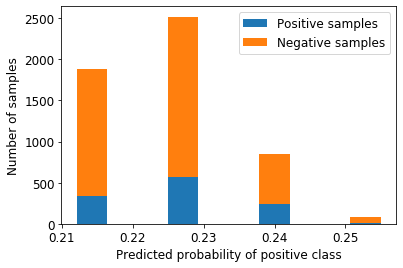

In [43]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

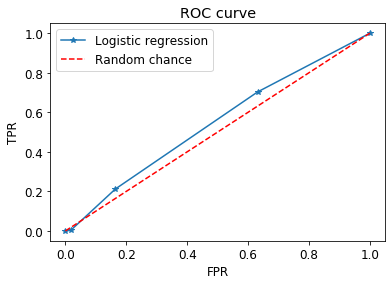

In [45]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [46]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [47]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642